In [4]:
import os
from pathlib import Path
import numpy as np
from PIL import Image
from tqdm import tqdm

In [5]:
img_path = "/home/silverjoda/SW/st_happens/st_happens/data/raw_imgs"

# Get image names
img_filenames = os.listdir(img_path)

# Alphabetically sort the list of files
img_filenames.sort(reverse=True)

In [6]:
# open and show the last image in the list
img = Image.open(os.path.join(img_path, img_filenames[-1]))
img.show()

In [7]:
# Rename files
# for f_name, score in zip(img_filenames, range(1, len(img_files) + 1)):
#    os.rename(os.path.join(img_path, f_name), os.path.join(img_path, str(score) + ".jpg"))

In [8]:
# # Resize files one by one
# target_height = 750 # with 4/3 aspect ratio this makes target width to be 1000px
# for f_name in tqdm(img_filenames):
#     img = Image.open(os.path.join(img_path, f_name))
#     img_width, img_height = img.size

#     target_divisor = img_height // target_height

#     width = img_width // target_divisor
#     height = img_height // target_divisor

#     img = img.resize((width, height))
#     img.save(os.path.join(img_path, f_name))

In [9]:
# Rotate images 90 degrees clockwise
# for f_name in tqdm(img_filenames):
#     img = Image.open(os.path.join(img_path, f_name))
#     img = img.rotate(-90, expand=True)
#     img.save(os.path.join(img_path, f_name))

In [10]:
img_filenames = os.listdir(img_path)

# Load all image files and put in numpy array
for i in tqdm(range(1, 201)):
    img = Image.open(os.path.join(img_path, str(i) + ".jpg"))
    img = np.array(img)
    img = img.reshape(1, img.shape[0], img.shape[1], 3)
    if i == 1:
        img_array = img
    else:
        img_array = np.concatenate((img_array, img), axis=0)

img_array.shape

100%|██████████| 200/200 [00:10<00:00, 19.55it/s]


(200, 1156, 867, 3)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, feature, morphology, measure, transform
import skimage.transform

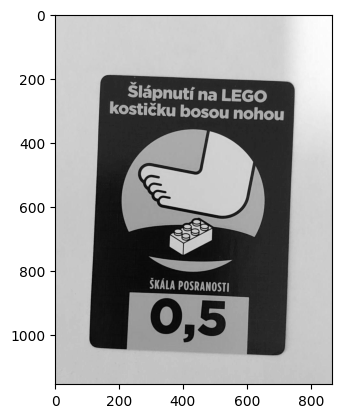

In [28]:
# Load the image
image = io.imread(os.path.join(img_path, "1.jpg"))

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

plt.imshow(gray_image, cmap="gray")

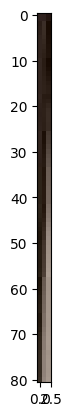

In [44]:
# Blur image first
gray_image = filters.gaussian(gray_image, sigma=1.0)

# Apply edge detection using Canny edge detector
edges = feature.canny(gray_image, sigma=1.0)

# Find contours in the edge map
contours = measure.find_contours(edges, 0.9)

# Find the largest contour (assuming it's the playing card)
largest_contour = max(contours, key=lambda x: len(x))

# Convert the contour points to a rectangular shape
rectangular_points = np.array(
    [largest_contour.min(axis=0), largest_contour.max(axis=0)]
)
rectangular_points = rectangular_points.astype(int)

# Crop the playing card from the original image
cropped_card = image[
    rectangular_points[0, 0] : rectangular_points[1, 0],
    rectangular_points[0, 1] : rectangular_points[1, 1],
]

plt.imshow(cropped_card)


In [36]:


# Define the fixed resulting image size (e.g., 200x300)
result_size = (200, 300)

# Define the target coordinates for the homography transformation
target_coordinates = np.array(
    [
        [0, 0],
        [result_size[1], 0],
        [result_size[1], result_size[0]],
        [0, result_size[0]],
    ],
    dtype=float,
)

src = np.array([[0, 0], [0, 50], [300, 50], [300, 0]])
dst = np.array([[155, 15], [65, 40], [260, 130], [360, 95]])

tform3 = transform.ProjectiveTransform()
tform3.estimate(src, dst)
warped = transform.warp(text, tform3, output_shape=(50, 300))

# Apply the homography transformation to make the card vertical and resize it
transformed_card = skimage.transform.warp(
    cropped_card, homography_matrix, output_shape=result_size
)

# Display the original and transformed images
plt.subplot(1, 2, 1)
plt.imshow(cropped_card)
plt.title("Original Card")

plt.subplot(1, 2, 2)
plt.imshow(transformed_card)
plt.title("Transformed Card")

plt.show()

AttributeError: module 'skimage.transform' has no attribute 'find_homography'

In [ ]:
# Use streamlit to make a web app for the game